# Lecture 3c

## Test Statistics

This example will demonstrate the statistical properties of the test statistic

$$t = \frac{\hat\beta - \beta_{\text{null}}}{\text{SE}(\hat\beta)}$$


## The Statistical Properties of test statistic under the NULL hypothesis

This example will demonstrate the distribution of the test statistic under the null hypothesis $\beta_0=0$, $\beta_1=0$

**i.e. what would the estimates look like if the null were true?**


In [19]:
set.seed(1)

S <- 1000 #number of samples
n <- 100 #number of observations per sample

b0 <- 0
b1 <- 0

e <- replicate(S,rnorm(n)) #draw S samples

x <- 1:n

y <- b0 + b1*x + e

bh=matrix(,2,S) #initialize matrix to store estimates of beta
seh=matrix(,2,S) #initialize matrix to store estimates of beta

for (s in 1:S){
    lm.fit=lm(y[,s]~x) # estimate the linear model on the sample s.
    bh[1:2,s] <- coef(lm.fit)   #store the estimates    
    seh[1:2,s] <- sqrt(diag(vcov(lm.fit)))   #store the standard errors
}

t0=bh[1,]/seh[1,]
t1=bh[2,]/seh[2,]

Notice that each test statistic is different. This is due to the randomness in each of the training samples. We can see this in histograms for $t_0$ and $t_1$.

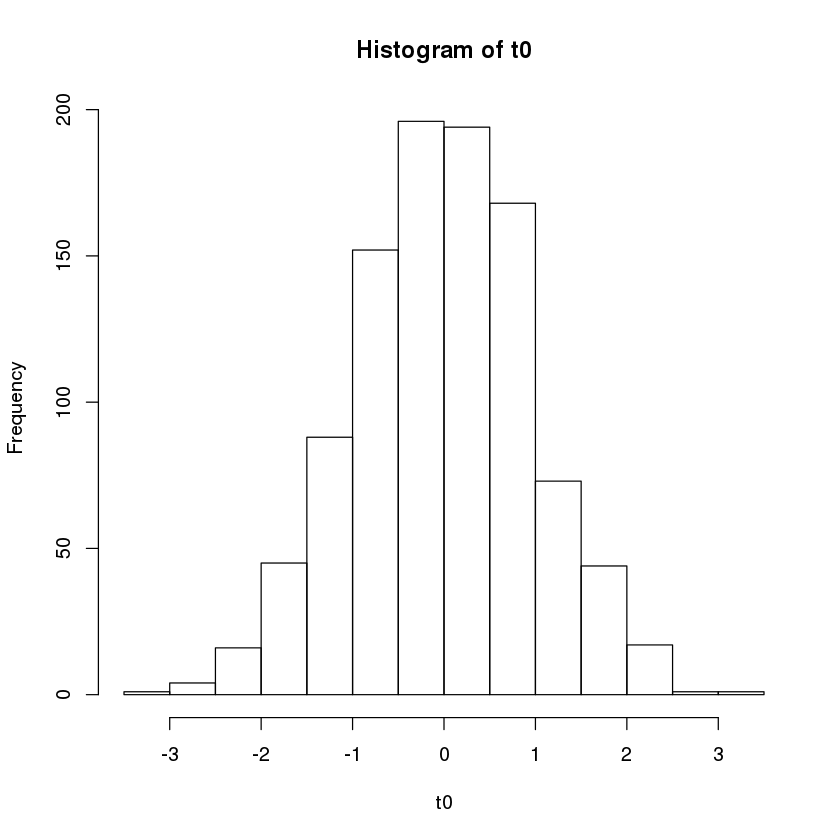

In [20]:
hist(t0)

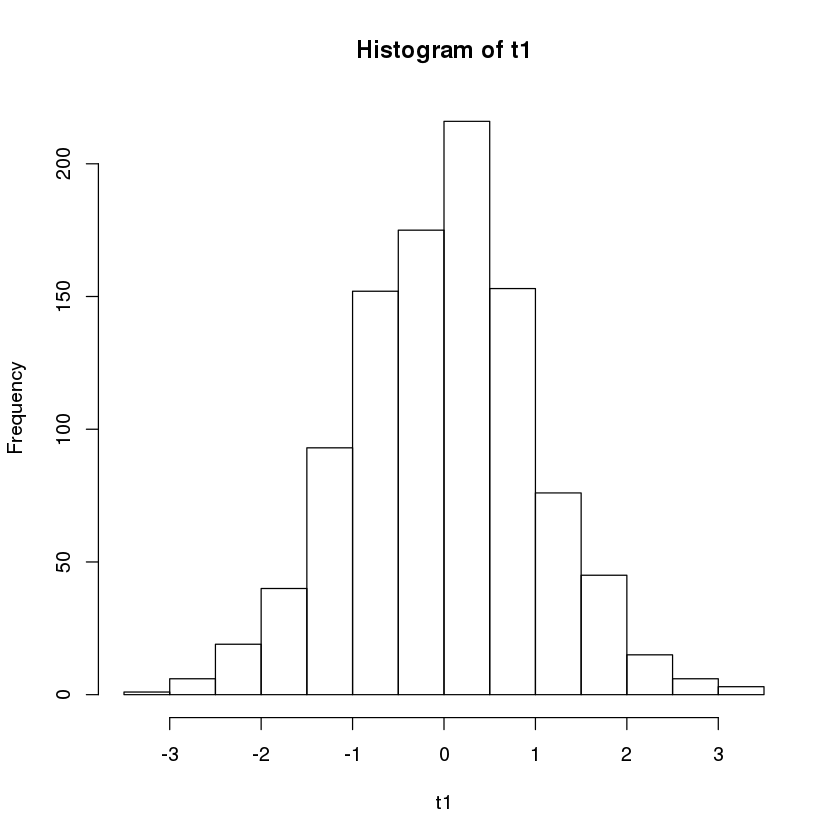

In [21]:
hist(t1)

Notice that there is some probability that the test-statisic, by chance, is out in the tail of this distribution?

For example, in roughly 5% of the sample, the test statistic is larger than 1.96. As the number of samples in our simulation goes to infinity, this number will approach 0.05 (try it!).

In [22]:
mean(abs(t1)>1.96)

[1] 0.055

This is a demonstartion of how a 0.05 level hypothesis test will *incorrectly* reject a true null hypothesis 0.05 of the time. This is called a Type I Error.

## The Statistical Properties of the test statistic under the ALTERNATIVE hypothesis

This example will demonstrate the distribution of the test statistic under an alternative hypothesis $\beta_0=0$, $\beta_1=0.15$

**i.e., what would the test statistics look like if the alternative were true?**

In [1]:
set.seed(1)
S <- 1000 #number of samples
n <- 100 #number of observations per sample

b0 <- 0
b1 <- .015 #the alternative is true, b1 is not 0

e <- replicate(S,rnorm(n)) #draw S samples

x <- 1:n

y <- b0 + b1*x + e

t0_alt=matrix(,1,S) #initialize matrix to store tstat for beta_1
t1_alt=matrix(,1,S) #initialize matrix to store tstat for beta_2

for (s in 1:S){
    lm.fit=lm(y[,s]~x) # estimate the linear model on the sample s.
    t0_alt[,s] <- summary(lm.fit)$coefficients[1,3]   #store the tstat for beta_0  
    t1_alt[,s] <- summary(lm.fit)$coefficients[2,3]   #store the tstats for beta_1
}



In [24]:
summary(lm.fit) #report the linear fit of the last sample


Call:
lm(formula = y[, s] ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2229 -0.8001  0.1769  0.8318  2.3073 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.020570   0.238411   0.086 0.931420    
x           0.014995   0.004099   3.659 0.000411 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.183 on 98 degrees of freedom
Multiple R-squared:  0.1202,	Adjusted R-squared:  0.1112 
F-statistic: 13.38 on 1 and 98 DF,  p-value: 0.0004106


Notice that the linear fit does a good job of estimating the coefficients.

We can now plot the test statistics from each of the samples:

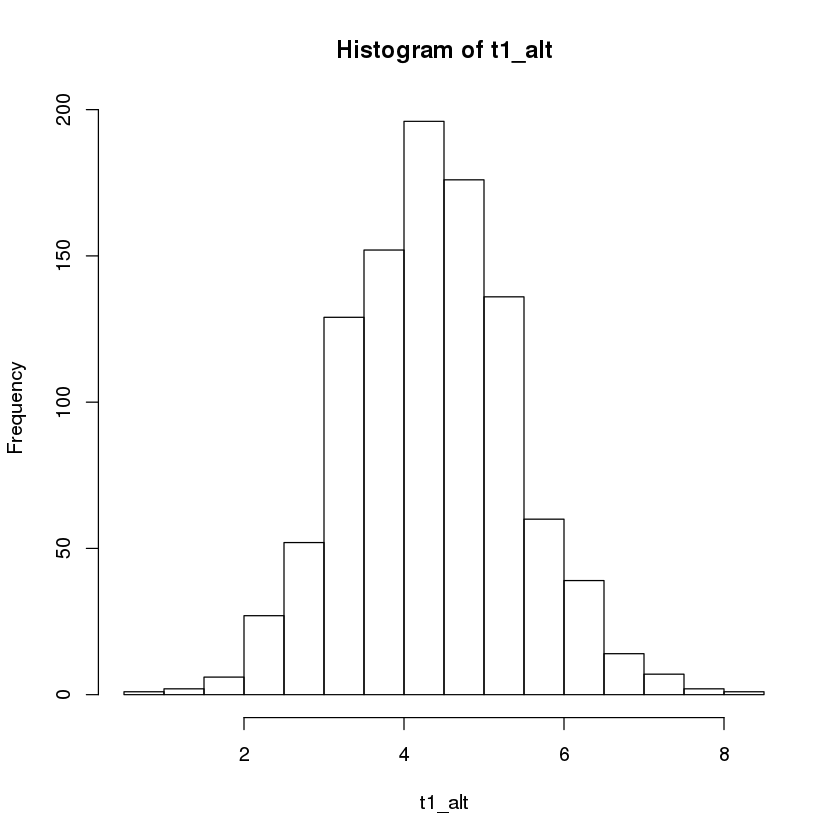

In [25]:
hist(t1_alt)

Notice how this distribution is shifted far to the right (compared to the distribution under the null)? 

**When the alternative is true**, you should expect the test statistic from any given sample to lie above 1.96. 

To verify this, we can calculate the p-values (for the null hypothesis $\beta_1=0$) for each sample:

In [10]:
pvals <-2*(1-pt(abs(t1_alt),98)) #calculate the pvalues for the test statisics under the null hypothesis, when the alternative is true
pvals

1.027337e-05,7.160618e-06,2.996065e-05,0.0005280386,0.0001172577,1.648131e-06,0.002272782,0.0002449847,3.966145e-05,0.001058714,⋯,0.0007348698,0.001633262,0.000502266,1.798428e-05,0.001888997,9.836081e-05,1.304959e-06,7.26084e-09,0.00200108,0.0004106434


Almost all of them reject

In [15]:
pvals<0.05

TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [18]:
sum(pvals<0.05) #how many reject, out of S samples

[1] 992

In the 8 samples in which the test doesn't reject the null hypothesis, this is a "false negative" or a Type II Error. The null hypotheis was False, but we failed to reject it becaue of noise in the sample.